# Pymaceuticals Inc.
---

### Observations and Insights

- **Gender Distribution of Mice**: The population sample of mice used for the study across drug regimens is evenly distributed across male and female genders, as evidenced by the pie chart with males at 51% and females at 49%.<br>
- **Drug Regimen Efficacy**: Based on the summary statistics for each drug regimen and related bar plots, the following can be inferred as it relates to the efficacy and performance of each of the drug regimens:<br>
> 1. *Capomulin* and *Ramicone* were were administered on the maximum number of mice at 230 and 228 respectively.<br>
> 2. For each of the above two drugs (*Capomulin, Ramicone*) the average and mean tumor volume were the lowest across all drug regimens. This suggests that these two drug regimens were more effective than the rest of the drugs.<br>
> 3. Despite being the third most administered drug regimen, *Ketapril* is the least effective of all the drugs with the highest values across all key parameters (*Mean, Median, Variance, Std. Deviation and SEM*).<br>
> 4. Based on the results, *Capomulin*, the drug of interest in this study is a viable option to pursue further advanced clinical trials to treat SCC and must be leveraged further in future drug regimens. 
- **Box Plot Analysis**: Based on the box plots summarizing the final tumor volume for each of the four drug regimens (*Capomulin, Ramicone, Infubinol and Ceftamin*), the following can be inferred:<br>
> 1. *Capomulin* and *Ramicone* are more effective than the other two drugs, reinforcing the earlier summary statistics.<br>
> 2. *Infubinol* also happens to have an outlier in the dataset based on the related quartiles and IQR calculations.<br>
- **Linear Regression Analysis**: Based on the linear regression analysis of the mouse weight against the average tumor volume, the following insights can be obtained:<br>
> 1. There is a positive correlation between the average tumor volume and the weight of the mouse (*0.84*). This suggests that as the weight of the mouse increases, the average tumor volume also increases. Hence keeping the mice on a healthy diet that actively regulates their weight will be impactful.<br>
> 2. The slope of the linear regression (*0.95*) indicates a fairly consistent relationship between the dependent variable (*average size of the tumor*) with the independent variable (*mouse weight*) where for every increase of 1 unit in the weight of the mouse, the average size of the tumor increases by an approximately similar amount.<br>
---
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Complete_Mice_Data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview - minor data wrangling for hiding the index
Complete_Mice_Data.head().style.hide(axis="index")

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique values of mice in the dataset
Total_Mice_Initial = len(Complete_Mice_Data.groupby('Mouse ID').count())
print('Total number of mice in raw dataset: ', Total_Mice_Initial)

Total number of mice in raw dataset:  249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
Mice_With_Duplicated_Data = Complete_Mice_Data[Complete_Mice_Data.duplicated(['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint - use duplicated() method for this
Duplicate_Mouse_ID = Mice_With_Duplicated_Data['Mouse ID'].unique()
print('Mouse ID with duplicate data: ', Duplicate_Mouse_ID)

Mouse ID with duplicate data:  ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID, by using the 'Set Index' method for 'Mouse ID'
Combined_Mice_Data_With_Index = Complete_Mice_Data.set_index('Mouse ID')
Combined_Mice_Data_With_Index.loc[Duplicate_Mouse_ID]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Complete_Mice_Data_Clean_Version = Combined_Mice_Data_With_Index.drop(['g989'])

In [6]:
# Checking the number of mice in the clean DataFrame.
Total_Mice_Final = len(Complete_Mice_Data_Clean_Version.groupby('Mouse ID').count())
print('Total number of mice in cleaned up dataset: ', Total_Mice_Final)

Total number of mice in cleaned up dataset:  248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_Volume_By_Regimen = Complete_Mice_Data_Clean_Version.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Mean_Tumor_Volume = Tumor_Volume_By_Regimen['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = Tumor_Volume_By_Regimen['Tumor Volume (mm3)'].median()
Variance_Tumor_Volume = Tumor_Volume_By_Regimen['Tumor Volume (mm3)'].var()
STD_Tumor_Volume = Tumor_Volume_By_Regimen['Tumor Volume (mm3)'].std()
SEM_Tumor_Volume = Tumor_Volume_By_Regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Tumor_Summary_Statistics = pd.DataFrame({
                           "Mean Tumor Volume": Mean_Tumor_Volume,
                           "Median Tumor Volume": Median_Tumor_Volume,
                           "Tumor Volume Variance": Variance_Tumor_Volume,
                           "Tumor Volume Std. Dev.": STD_Tumor_Volume,
                           "Tumor Volume Std. Err.": SEM_Tumor_Volume    
                                       })
# Print the relevant dataframe from above
Tumor_Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

Tumor_Summary_Statistics_Advanced_Method = Complete_Mice_Data_Clean_Version.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Print the relevant dataframe from above
Tumor_Summary_Statistics_Advanced_Method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

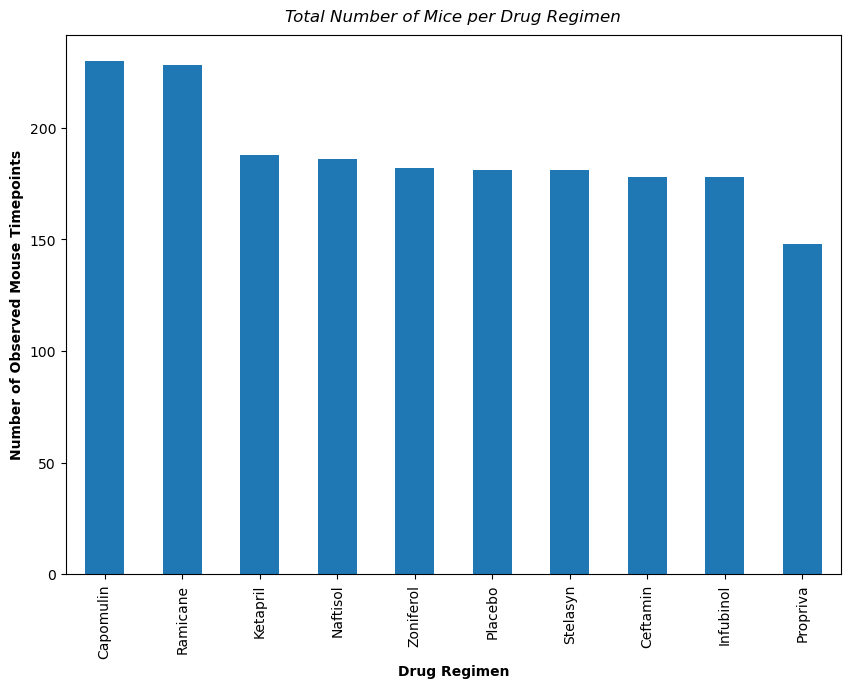

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Step 1: Use groupby on the drug regimen and then run a count of associated timepoints for each regimen
Timepoints_By_Regimen = Complete_Mice_Data_Clean_Version.groupby(['Drug Regimen'])['Timepoint'].count()

# Step 2: Display the result in a bar plot in DESC order based on the requirement and apply axis formating
pandas_plot_chart = Timepoints_By_Regimen.sort_values(ascending=False).plot(kind = 'bar', figsize = (10,7))
plt.title('Total Number of Mice per Drug Regimen', fontstyle = 'italic', size=12, pad = 10)
plt.xlabel('Drug Regimen', fontweight = 'bold', size=10)
plt.ylabel('Number of Observed Mouse Timepoints', fontweight = 'bold', size=10)

# Display the bar plot
plt.show()


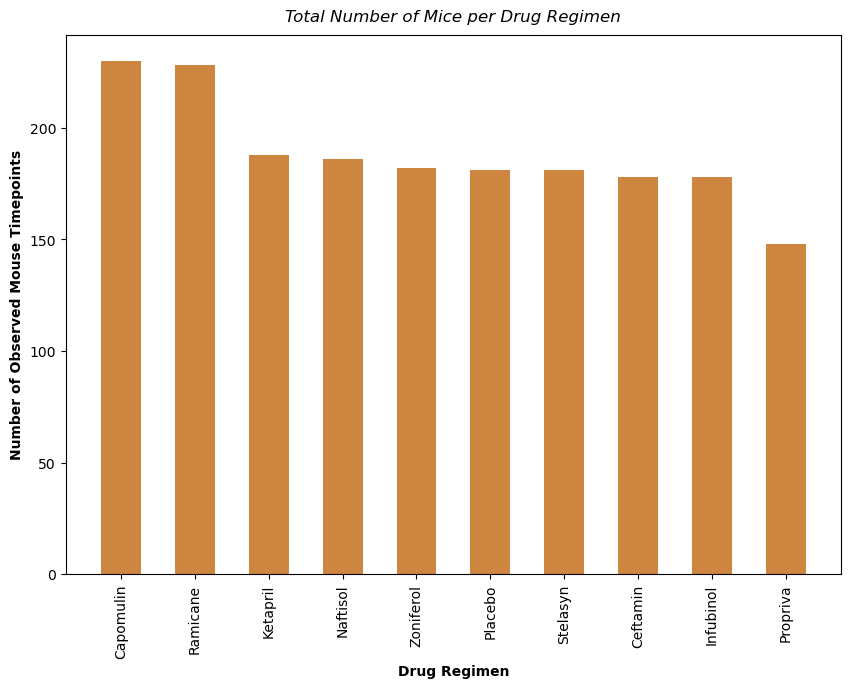

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Step 1: Sort the relevant dataset in DESC order based on observed timepoints
Timepoints_PyPlot = Timepoints_By_Regimen.sort_values(ascending=False)

# Step 2: Generate a bar plot with the necessary axis formating using pyplot
plt.rcParams['figure.figsize'] = [10, 7]
plt.bar(Timepoints_PyPlot.index, Timepoints_PyPlot.values, color = 'peru', width = 0.54)
plt.title('Total Number of Mice per Drug Regimen', fontstyle = 'italic', size=12, pad = 10)
plt.xlabel('Drug Regimen', fontweight = 'bold', size=10)
plt.ylabel('Number of Observed Mouse Timepoints', fontweight = 'bold', size=10)
plt.xticks(rotation='vertical')

# Step 3: Display the bar plot
plt.show()



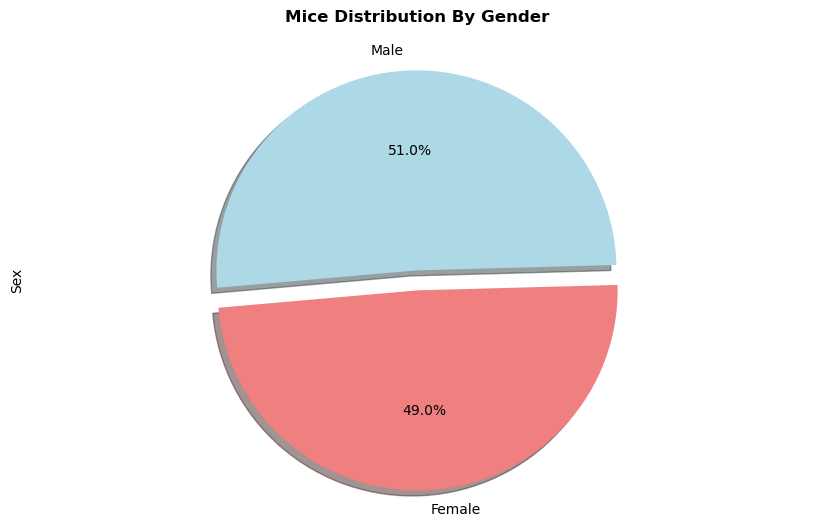

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Step 1: Use groupby on the sex of the mouse and then run a count of mice for each sex
Mice_Distribution_By_Sex = Complete_Mice_Data_Clean_Version.groupby(['Sex'])['Sex'].count()

# Step 2: Display the result in a pie plot based on the requirement and apply axis formating
pandas_pie_plot = Mice_Distribution_By_Sex.plot(kind = 'pie', y ='Sex', colors = ['lightcoral', 'lightblue'], explode = (0.1, 0), startangle = 185, shadow = True, autopct='%1.1f%%', figsize = (10, 6))
plt.title('Mice Distribution By Gender', fontweight = 'bold', size=12, pad = 20)
plt.axis("equal")

# Step 3: Display the pie plot
plt.show()


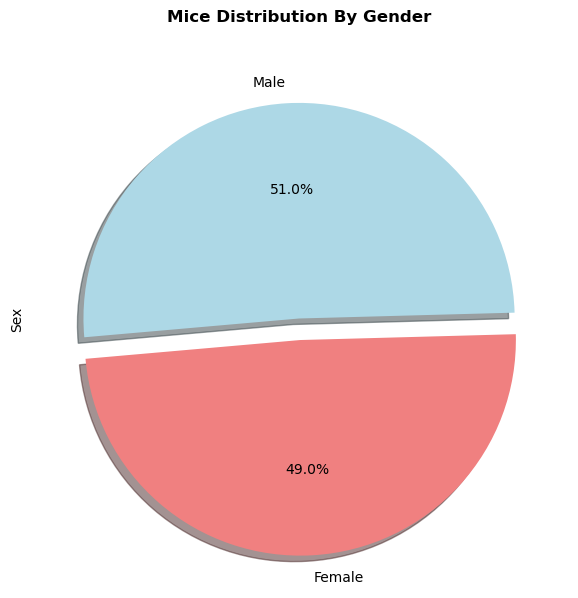

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Step 1: Using pyplot, generate the Pie Plot based on custom values as in the previous version
plt.rcParams['figure.figsize'] = [10, 7]
plt.pie(Mice_Distribution_By_Sex, labels = ('Female', 'Male'), colors = ['lightcoral', 'lightblue'], explode = (0.1, 0), shadow = True, startangle = 185, autopct='%1.1f%%')
plt.title('Mice Distribution By Gender', fontweight = 'bold', size=12, pad = 20)
plt.ylabel('Sex')

# Step 2: Display the pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Step 1: Start by getting the last (greatest) timepoint for each mouse
Last_TMP_Per_Mouse = Complete_Mice_Data_Clean_Version.groupby(['Mouse ID'])['Timepoint'].max()

# Step 2: Convert the above series into a new dataframe for merging
Last_TMP_Per_Mouse = Last_TMP_Per_Mouse.reset_index()

# Step 3: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Complete_Mice_Data_With_Last_TMP = pd.merge(Complete_Mice_Data_Clean_Version, Last_TMP_Per_Mouse, on = ('Mouse ID', 'Timepoint'), how = 'right')

# Print the relevant dataframe from above
Complete_Mice_Data_With_Last_TMP

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
mice_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in mice_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = Complete_Mice_Data_With_Last_TMP.loc[Complete_Mice_Data_With_Last_TMP["Drug Regimen"] == drug_regimen, "Tumor Volume (mm3)"]
    
    # add subset using the append method
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    IQR = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds along with the outliers based on the above
    lower_bound = lower_quartile - (1.5 * IQR)
    upper_bound = upper_quartile + (1.5 * IQR)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the outliers for each treatment
    print(f"For {drug_regimen}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


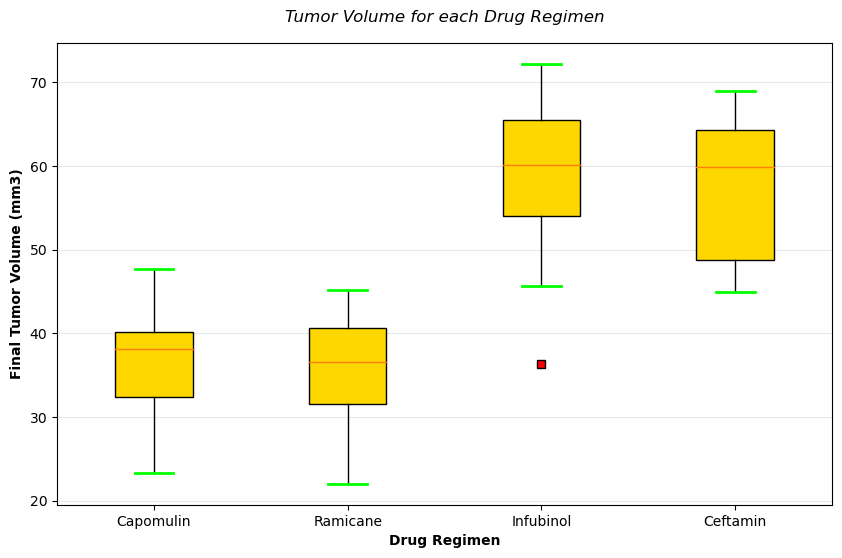

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Step 1: Basic customization for the box plot
fig, ax = plt.subplots(figsize=(10 , 6))
ax.set_title('Tumor Volume for each Drug Regimen', fontsize = 12, fontstyle = 'italic', pad = 15)
ax.set_xlabel('Drug Regimen', fontsize = 10, fontweight = 'bold')
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize = 10, fontweight = 'bold')

# Step 2: Add a horizontal grid to the plot, but hide the grid behind the plot objects
ax.yaxis.grid(True, linestyle ='-', which ='major', color ='lightgrey', alpha = 0.5)
ax.set(axisbelow = True)

# Step 3: Generate the box plot based on the previous customizations
ax.boxplot(total_tumor_vol, labels = mice_treatments, boxprops = dict(facecolor = "gold"), flierprops = dict(marker = "s", markerfacecolor = "red"), capprops = dict(color = "lime", linewidth = 2), widths = 0.4, patch_artist = True, vert = True)

# Step 4: Display the box plot
plt.show()

## Line and Scatter Plots

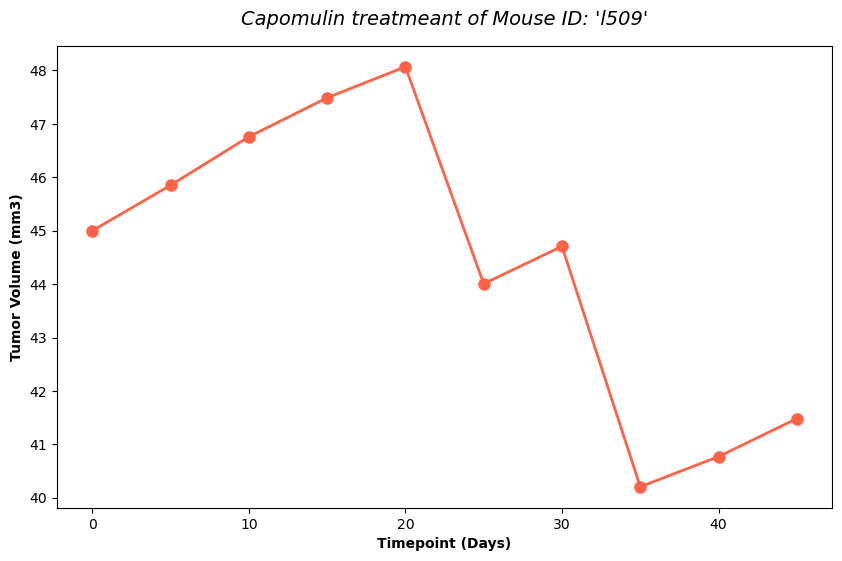

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Step 1: Locate all mice with the Capomulin treatment program
Capomulin_Treatment = Complete_Mice_Data.loc[Complete_Mice_Data["Drug Regimen"] == "Capomulin",:]

# Step 2: Get the data for a specific mouse in the above drug regimen (Mouse ID: l509)
Sample_Mouse_In_Capomulin = Capomulin_Treatment.loc[Capomulin_Treatment["Mouse ID"] == "l509",:]

# Step 3: Create line plot parameters 
Sample_Mouse_ID = Sample_Mouse_In_Capomulin["Timepoint"]
Tumor_Volume_Sample_Mouse = Sample_Mouse_In_Capomulin["Tumor Volume (mm3)"]

# Step 4: Generate the line plot with relevant customization
plt.rcParams['figure.figsize'] = [10, 6]
plt.title("Capomulin treatmeant of Mouse ID: 'l509'", fontsize = 14, fontstyle = 'italic', pad = 15)
plt.xlabel("Timepoint (Days)", fontsize = 10, fontweight = 'bold')
plt.ylabel("Tumor Volume (mm3)", fontsize = 10, fontweight = 'bold')
plt.plot(Sample_Mouse_ID, Tumor_Volume_Sample_Mouse, linewidth = 2, markersize = 8, marker="o", color = "tomato")

# Step 5: Display the plot
plt.show()


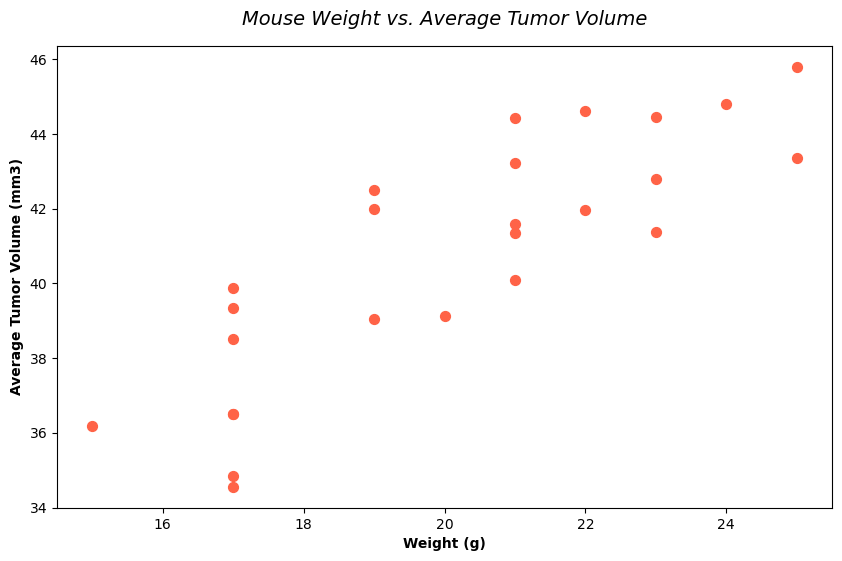

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Use the dataframe created in the previous step to compute the average tumor volume for mice treated via Capomulin
Average_Capomulin = Capomulin_Treatment.filter(items = ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']).groupby(['Mouse ID']).mean()

# Step 2: Generate a scatter plot based with added customization
plt.rcParams['figure.figsize'] = [10, 6]
plt.title("Mouse Weight vs. Average Tumor Volume", fontsize = 14, fontstyle = 'italic', pad = 15)
plt.xlabel("Weight (g)", fontsize = 10, fontweight = 'bold')
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 10, fontweight = 'bold')
plt.scatter(Average_Capomulin['Weight (g)'], Average_Capomulin['Tumor Volume (mm3)'], s = 50, color = "tomato")

# Step 3: Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
Linear Regression Line Equation: y = 0.95x + 21.55


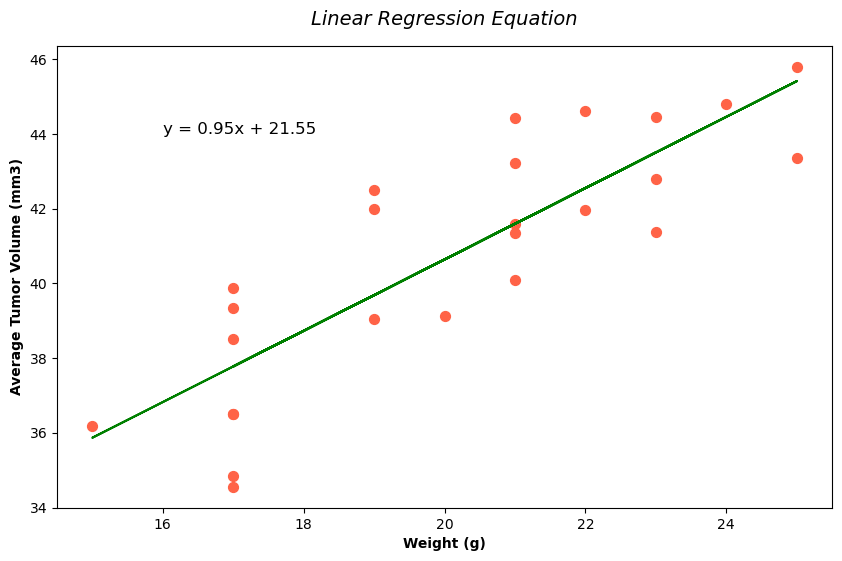

In [18]:
# Calculate the correlation coefficient and a linear regression model - for mouse weight and average observed tumor volume for the entire Capomulin regimen.

# Step 1: Use Pearson's correlation method to compute the correlation coffecient for the given data
# Note: Round to two decimal places and get the first value of the result
# Use ANSI Escape code for bold text for formating the result
correlation_coeff = round(st.pearsonr(Average_Capomulin['Weight (g)'], Average_Capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: \033[1m{correlation_coeff}\033[0m")

# Step 2: Prepare the axes for the linear regression model
x_values = Average_Capomulin['Weight (g)']
y_values = Average_Capomulin['Tumor Volume (mm3)']

# Step 3: Use the linear regression scipy class
result_regression = st.linregress(x_values, y_values)
# Calculate the slope and intercept of the desired linear regression equation
slope = result_regression[0]; intercept = result_regression[1]

# Step 4: Generate the line equation for the regression
# Use ANSI Escape code for bold text for formating the result
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Line Equation: \033[1m{linear_equation}\033[1m")

# Step 5: Generate the linear regression plot based on the above values with customization
plt.rcParams['figure.figsize'] = [10, 6]
plt.title("Linear Regression Equation", fontsize = 14, fontstyle = 'italic', pad = 15)
plt.xlabel("Weight (g)", fontsize = 10, fontweight = 'bold')
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 10, fontweight = 'bold')
plt.scatter(Average_Capomulin['Weight (g)'], Average_Capomulin['Tumor Volume (mm3)'], s = 50, color = "tomato")
plt.annotate(linear_equation, xy = (16, 44), fontsize=12, color="black")
plt.plot(x_values, regress_values, '-g')

# Step 6: Display the plot
plt.show()
